### Import libraries and data for analysis

In [1]:
# Imports
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
# Import csv files with price data
aapl_hist = Path("./input_data/aapl_hist.csv")
amzn_hist = Path("./input_data/amzn_hist.csv")
btc_hist = Path("./input_data/btc_hist.csv")
dia_hist = Path("./input_data/dia_hist.csv")
msft_hist = Path("./input_data/msft_hist.csv")
qqq_hist = Path("./input_data/qqq_hist.csv")
spy_hist = Path("./input_data/spy_hist.csv")

In [3]:
# Read in data and index by Date column
aapl_data = pd.read_csv(aapl_hist, index_col='Date')
amzn_data = pd.read_csv(amzn_hist, index_col='Date')
btc_data = pd.read_csv(btc_hist, index_col='Date')
dia_data = pd.read_csv(dia_hist, index_col='Date')
msft_data = pd.read_csv(msft_hist, index_col='Date')
qqq_data = pd.read_csv(msft_hist, index_col='Date')
spy_data = pd.read_csv(spy_hist, index_col='Date')

### Combine DataFrames, Sort Index, and Rename Columns

In [4]:
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([aapl_data, amzn_data, btc_data, dia_data, msft_data, qqq_data, spy_data], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Set column names
combined_df.columns = ['AAPL', 'AMZN', 'BTC', 'DIA', 'MSFT', 'QQQ', 'SPY']

# Confirm there are no nulls in dataframe
print(combined_df.isnull().sum())

# Display a few rows
combined_df.tail(10)

AAPL    0
AMZN    0
BTC     0
DIA     0
MSFT    0
QQQ     0
SPY     0
dtype: int64


AAPL     AMZN       BTC     DIA    MSFT     QQQ     SPY
Date                                                                 
2021-07-07  144.57  3696.58  34149.99  346.71  279.93  279.93  434.46
2021-07-08  143.24  3731.41  33932.25  344.18  277.42  277.42  430.92
2021-07-09  145.11  3719.34  32933.58  348.52  277.94  277.94  435.52
2021-07-12  144.50  3718.55  34299.94  349.82  277.32  277.32  437.08
2021-07-13  145.64  3677.36  33262.65  348.79  280.98  280.98  435.59
2021-07-14  149.15  3681.68  32676.38  349.20  282.51  282.51  436.24
2021-07-15  148.48  3631.20  32878.50  349.73  281.03  281.03  434.75
2021-07-16  146.39  3573.63  31726.04  346.74  280.75  280.75  431.34
2021-07-19  142.45  3549.59  31919.39  339.88  277.01  277.01  424.97
2021-07-20  146.15  3573.19  30928.21  345.08  279.32  279.32  431.06

# How does Bitcoin price performance and volatility compare to equity markets?

### Calculate daily and cumulative returns. Compare BTC performance to equities

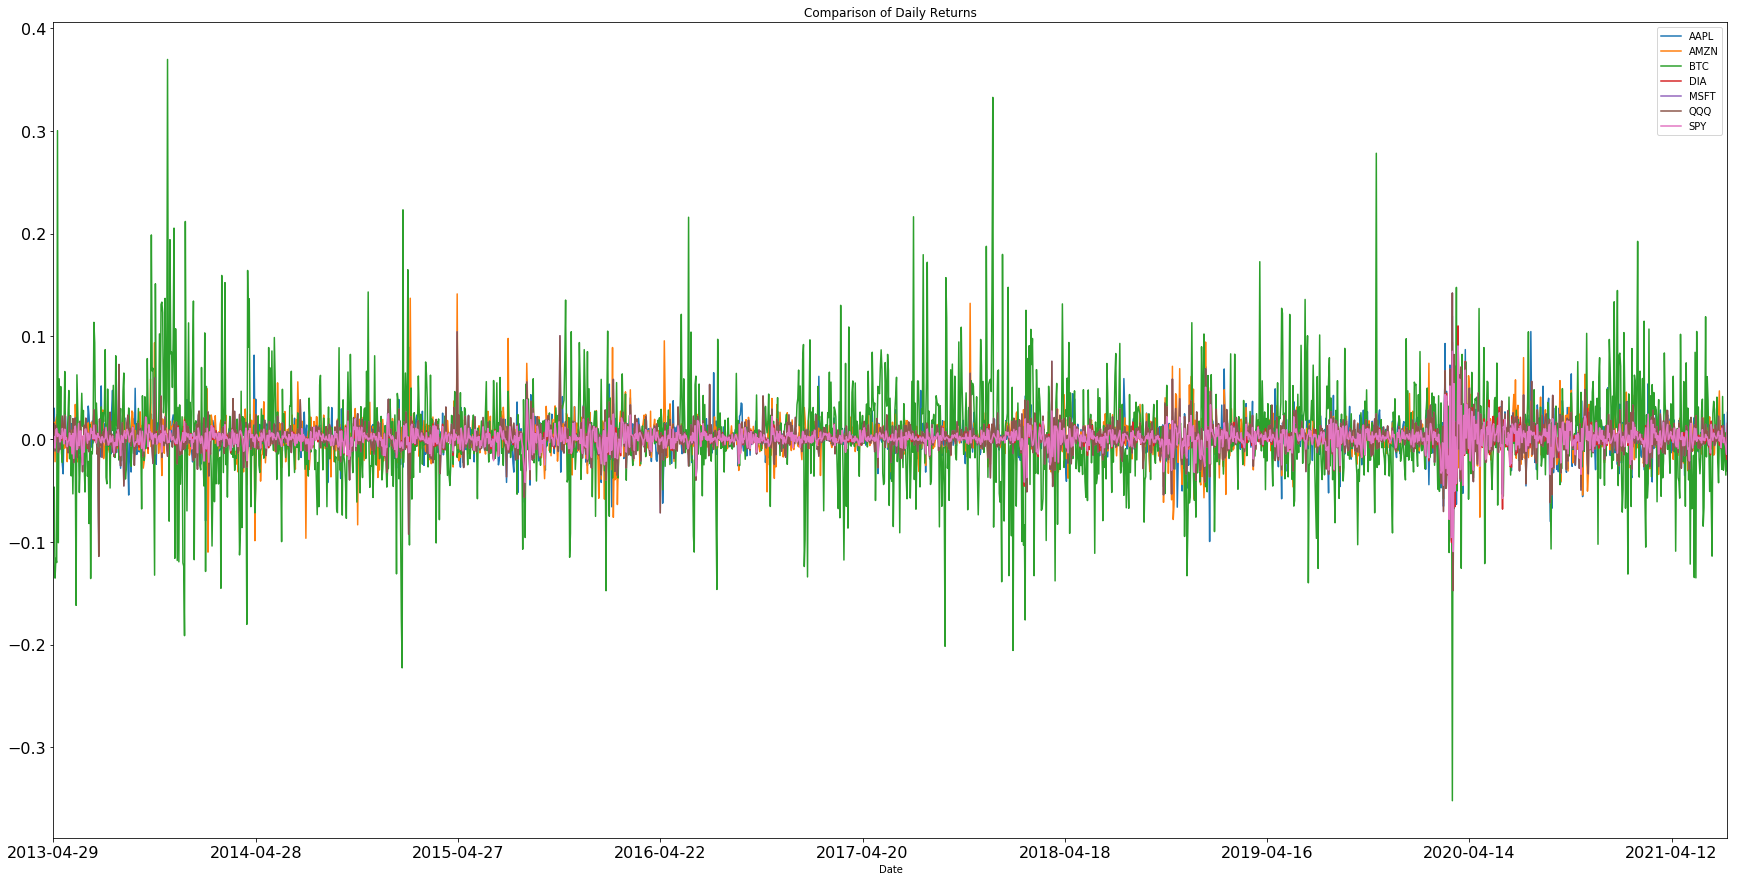

In [5]:
# Calculate daily returns of individual stocks, indices, & BTC
daily_returns = combined_df.pct_change()

# Plot daily returns of individual stocks, indices, & BTC
returns_plot = daily_returns.plot(figsize=(30,15), title = "Comparison of Daily Returns", fontsize=16)

# Save plot as image
returns_plot.figure.savefig("./images/daily_returns_full.png")

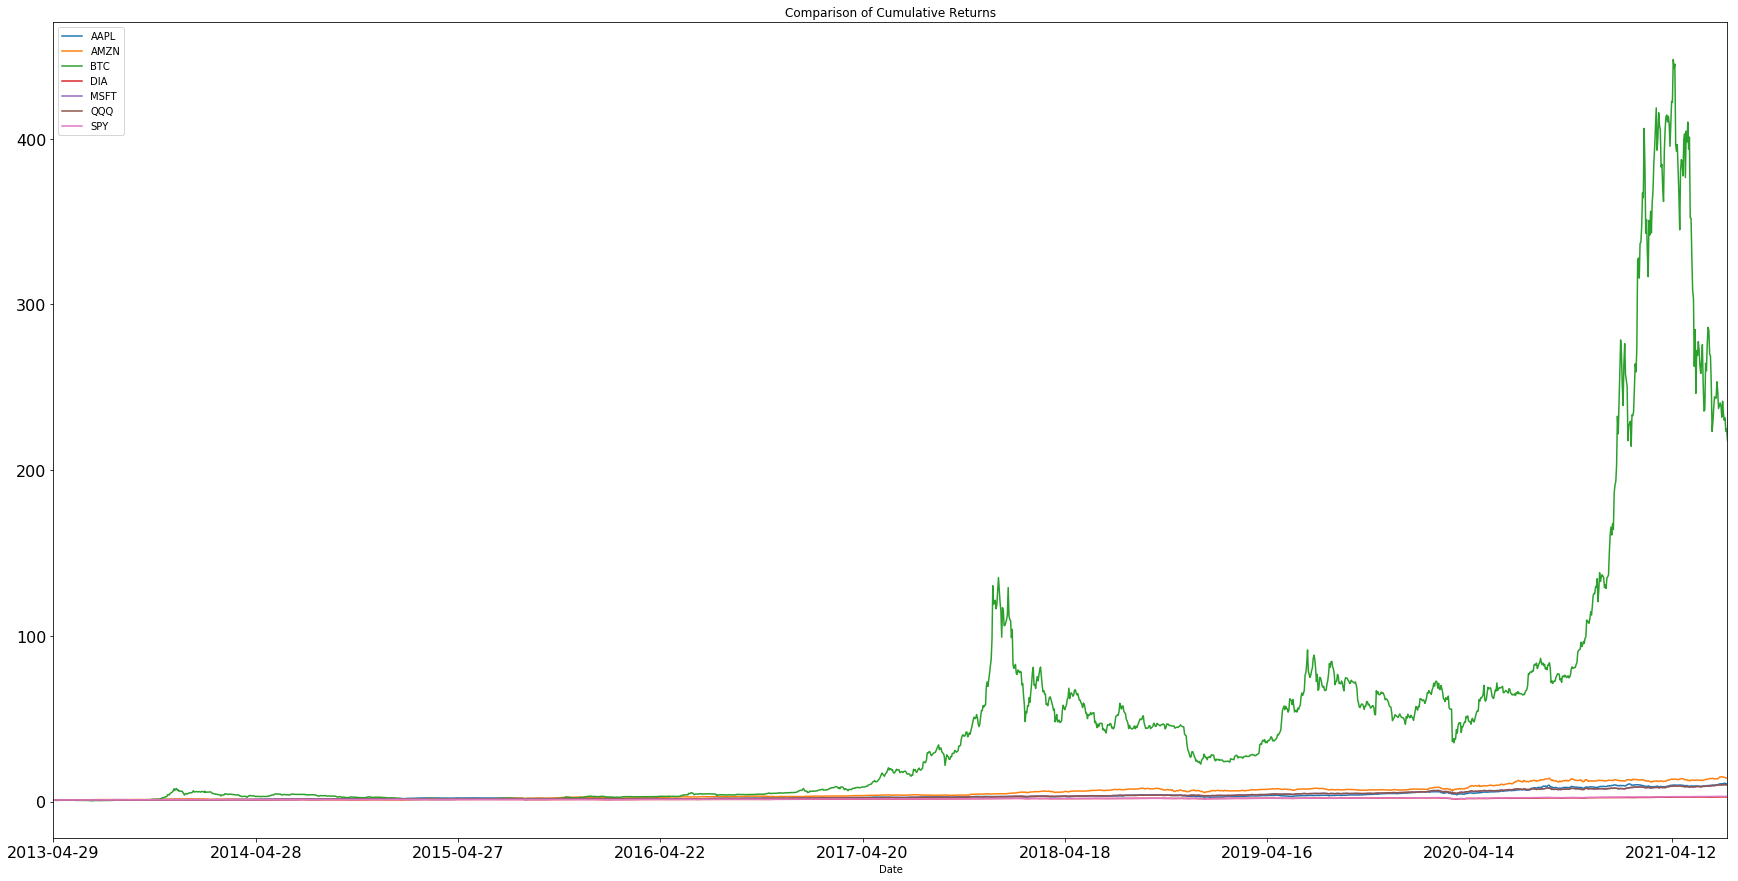

In [6]:
# Calculate cumulative returns of entities
cumulative_returns = (1 + daily_returns).cumprod()

# Plot cumulative returns of entities
cmltv_plot = cumulative_returns.plot(figsize=(30,15), title="Comparison of Cumulative Returns", fontsize=16)

# Save plot as image
cmltv_plot.figure.savefig("./images/cumulative_returns_full.png")

### Assess volatility of BTC compared to equities and ETFs

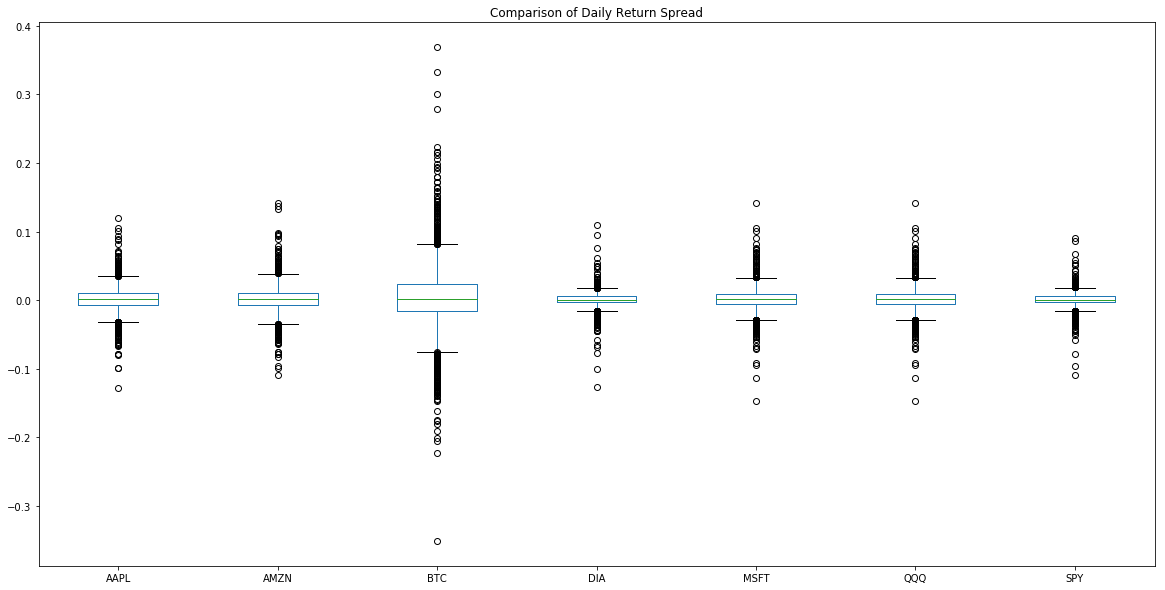

In [7]:
# Create box plot of daily returns
returns_box_plot = daily_returns.plot.box(figsize=(20,10), title="Comparison of Daily Return Spread")

# Save box plot as image
returns_box_plot.figure.savefig("./images/box_plot_full.png")

In [8]:
# Calculate daily and annualized standard deviation
daily_std = daily_returns.std()
annlzd_std = daily_returns.std() * np.sqrt(252)

In [9]:
# Create a dataframe containing daily and annualized standardized deviations in following 3 steps:
# Step 1: Create daily standard deviations dataframe
df_daily_std = pd.DataFrame(daily_std, columns=["Daily_StdDev"]).reset_index()
df_daily_std.rename(columns={"index": "Ticker"}, inplace=True)
df_daily_std.head()

Ticker  Daily_StdDev
0   AAPL      0.017798
1   AMZN      0.019064
2    BTC      0.049505
3    DIA      0.011024
4   MSFT      0.016634

In [10]:
# Step 2: Create annualized standard deviations dataframe
df_ann_std = pd.DataFrame(annlzd_std, columns = ["Ann_StdDev"]).reset_index()
df_ann_std.rename(columns={"index": "Ticker"}, inplace=True)
df_ann_std.head()

Ticker  Ann_StdDev
0   AAPL    0.282532
1   AMZN    0.302638
2    BTC    0.785872
3    DIA    0.175003
4   MSFT    0.264050

In [11]:
# Step 3: Combine dataframes created in previous 2 steps
df_std = pd.concat([df_daily_std, df_ann_std], axis="columns")
df_std.head()

Ticker  Daily_StdDev Ticker  Ann_StdDev
0   AAPL      0.017798   AAPL    0.282532
1   AMZN      0.019064   AMZN    0.302638
2    BTC      0.049505    BTC    0.785872
3    DIA      0.011024    DIA    0.175003
4   MSFT      0.016634   MSFT    0.264050

In [12]:
# Remove duplicate ticker column from combined dataframe. Source: https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns
df_std = df_std.loc[:,~df_std.columns.duplicated()]
df_std

Ticker  Daily_StdDev  Ann_StdDev
0   AAPL      0.017798    0.282532
1   AMZN      0.019064    0.302638
2    BTC      0.049505    0.785872
3    DIA      0.011024    0.175003
4   MSFT      0.016634    0.264050
5    QQQ      0.016634    0.264050
6    SPY      0.010584    0.168018

In [13]:
# Create standard deviation visualization with drop-down
df_std.hvplot.bar(y=["Daily_StdDev", "Ann_StdDev"],
                       groupby="Ticker",
                       color=["mediumseagreen", "skyblue"],
                       widget_location="right", 
                       height=400, 
                       width=400
                      )

Row
    [0] HoloViews(DynamicMap, widget_location='right')
    [1] Column
        [0] VSpacer()
        [1] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='Ticker', options=['AAPL', 'AMZN', ...], value='AAPL', width=250)
        [2] VSpacer()

In [14]:
# Replicate above visualization with all tickers combined for ease of comparison 
df_std.hvplot.bar(y=["Daily_StdDev", "Ann_StdDev"],
                       x="Ticker",
                       title="Volatility Comparison",
                       color=["mediumseagreen", "skyblue"],
                       fontsize=20,
                       height=800, 
                       width=1600,
                      )

:Bars   [Ticker,Variable]   (value)

# Is Bitcoin an outlier? 
# How does Bitcoin's performance and volatility compare to early price performance and volatility of leading stocks and indices?

### Prepare data for comparison of performance and volatility across first 3,000 trading days

In [15]:
# Slice price history data to pull closing prices from first 3000 trading days
# Drop "Date" field to facilitate merge. Looking at earliest 3000 trading days for each ticker; dates will vary
aapl_early_hist = aapl_data.head(3000).reset_index().drop(columns=["Date"])
amzn_early_hist = amzn_data.head(3000).reset_index().drop(columns=["Date"])
btc_hist = btc_data.head(3000).reset_index().drop(columns=["Date"])
dia_early_hist = dia_data.head(3000).reset_index().drop(columns=["Date"])
msft_early_hist = msft_data.head(3000).reset_index().drop(columns=["Date"])
qqq_early_hist = qqq_data.head(3000).reset_index().drop(columns=["Date"])
spy_early_hist = spy_data.head(3000).reset_index().drop(columns=["Date"])

# Combined sliced dataframes
combined_early_hist = pd.concat([aapl_early_hist, amzn_early_hist, btc_hist, dia_early_hist, msft_early_hist, qqq_early_hist, spy_early_hist], axis="columns", join="inner")
combined_early_hist.columns = ["AAPL", "AMZN", "BTC", "DIA", "MSFT", "QQQ", "SPY"]

# Confirm that there are no nulls in combined dataframe
print(combined_early_hist.isnull().sum())

# Display sample of combined dataframe
combined_early_hist.head()

AAPL    0
AMZN    0
BTC     0
DIA     0
MSFT    0
QQQ     0
SPY     0
dtype: int64


AAPL  AMZN     BTC    DIA  MSFT   QQQ    SPY
0  0.10  1.96  135.30  47.46  0.06  0.06  25.80
1  0.10  1.73  141.96  46.88  0.06  0.06  25.98
2  0.09  1.71  135.30  46.48  0.06  0.06  26.04
3  0.09  1.64  117.00  46.37  0.06  0.06  26.31
4  0.09  1.43  103.43  46.56  0.06  0.06  26.42

### Calculate daily and cumulative returns across first 3,000 trading days.
### Compare BTC performance to equities and indices.

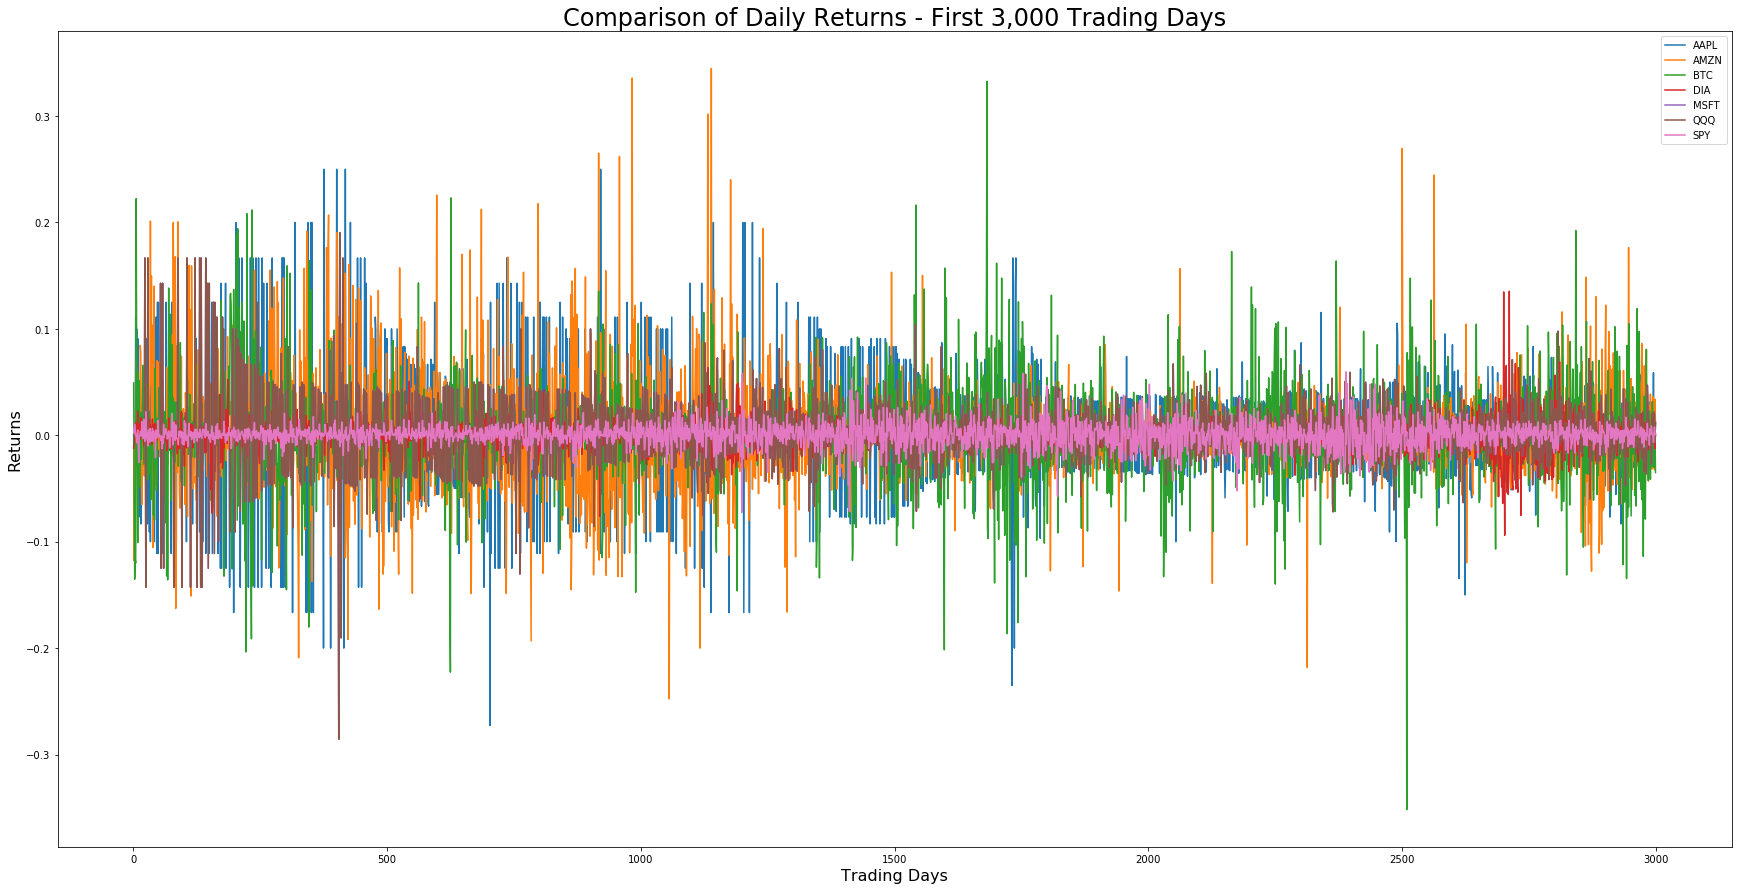

In [16]:
# Calculate daily returns for first 3000 trading days
early_hist_returns = combined_early_hist.pct_change()

# Plot daily returns for first 3000 trading days
fig = plt.figure(figsize=(30, 15))
plt.plot(early_hist_returns)
plt.title("Comparison of Daily Returns - First 3,000 Trading Days", fontsize=24)
plt.xlabel("Trading Days", fontsize=16)
plt.ylabel('Returns', fontsize=16)
plt.legend(early_hist_returns.columns)
plt.savefig("./images/daily_returns_first3000.png")
plt.show()

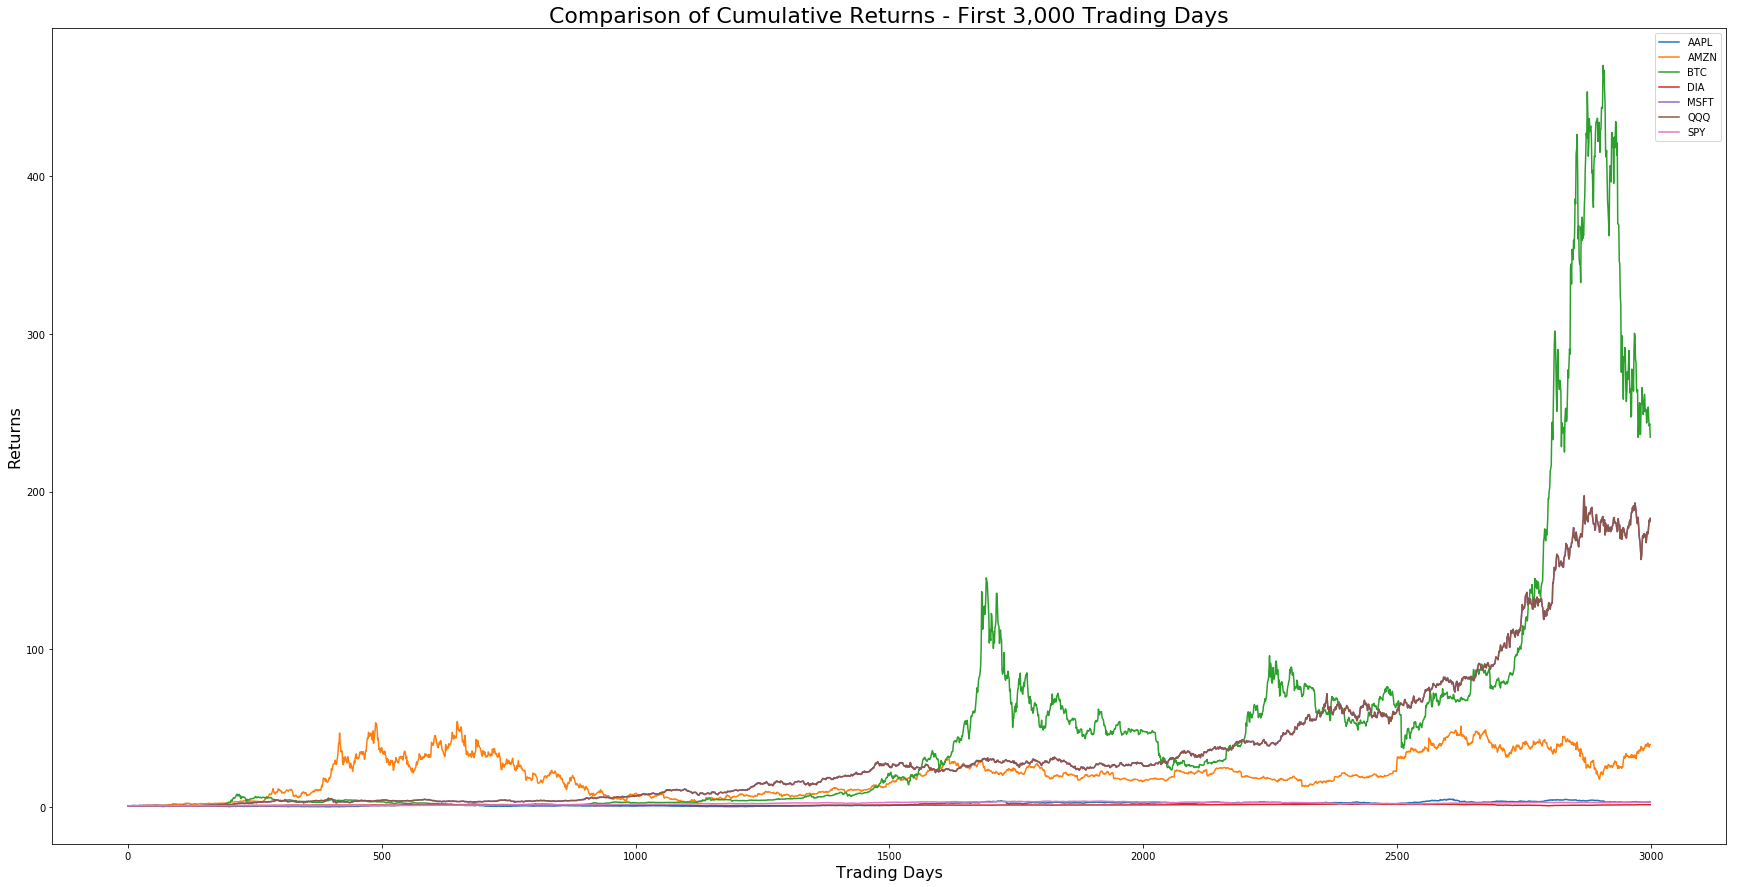

In [17]:
# Calculate cumulative returns for first 3000 trading days
early_cumulative_returns = (1 + early_hist_returns).cumprod()

# Plot cumulative returns for first 3000 trading days
fig = plt.figure(figsize=(30, 15))
plt.plot(early_cumulative_returns)
plt.title("Comparison of Cumulative Returns - First 3,000 Trading Days", fontsize=22)
plt.xlabel("Trading Days", fontsize=16)
plt.ylabel('Returns', fontsize=16)
plt.legend(early_cumulative_returns.columns)
plt.savefig("./images/cumulative_returns_first3000.png")
plt.show()

### Assess volatility across first 3,000 trading days

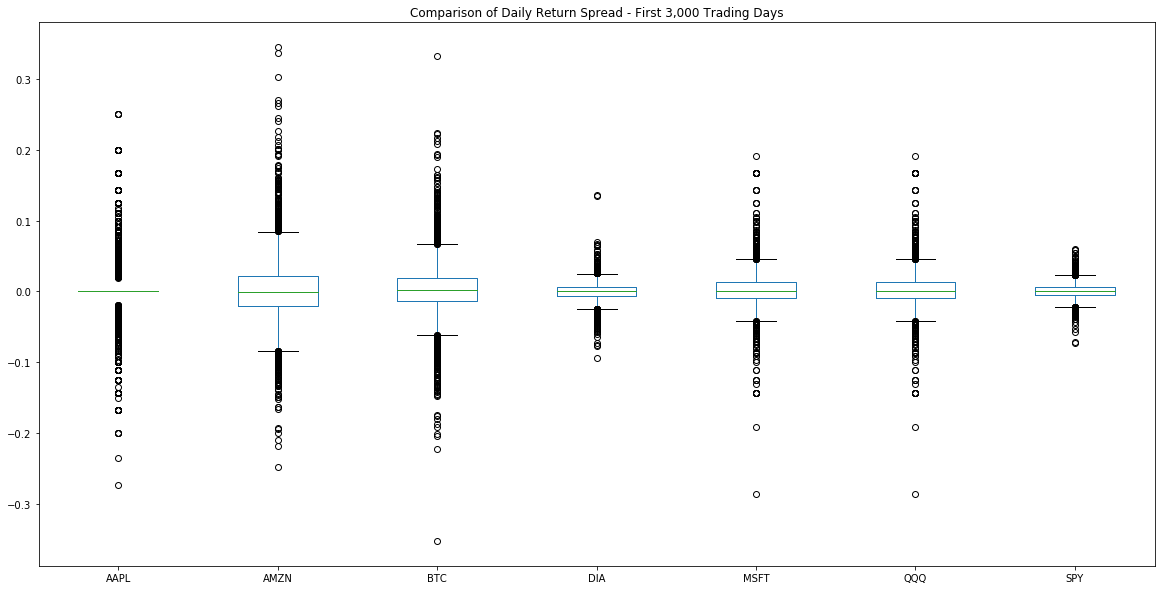

In [18]:
# Create box plot of daily returns for first 3000 trading days
first3000_returns_box_plot = early_hist_returns.plot.box(figsize=(20,10), title="Comparison of Daily Return Spread - First 3,000 Trading Days")
first3000_returns_box_plot.figure.savefig("./images/box_plot_first3000.png")

In [19]:
## Calculate daily and annualized standard deviation for first 3000 trading days
early_daily_std = early_hist_returns.std()
early_annlzd_std = early_hist_returns.std() * np.sqrt(252)

In [20]:
# Create a dataframe containing daily and annualized standardized deviations for first 3000 trading days:
# Step 1: Create dataframe with daily standard deviations for first 3000 trading days
df_early_daily_std = pd.DataFrame(early_daily_std, columns=["Daily_StdDev"]).reset_index()
df_early_daily_std.rename(columns={"index": "Ticker"}, inplace=True)
df_early_daily_std.head()

Ticker  Daily_StdDev
0   AAPL      0.044854
1   AMZN      0.047877
2    BTC      0.041809
3    DIA      0.013298
4   MSFT      0.028674

In [21]:
# Step 2: Create a dataframe with annualized standard deviations for first 3000 trading_days
df_early_ann_std = pd.DataFrame(early_annlzd_std, columns = ["Ann_StdDev"]).reset_index()
df_early_ann_std.rename(columns={"index": "Ticker"}, inplace=True)
df_early_ann_std.head()

Ticker  Ann_StdDev
0   AAPL    0.712035
1   AMZN    0.760024
2    BTC    0.663704
3    DIA    0.211105
4   MSFT    0.455181

In [22]:
# Step 3: Combine dataframes created in previous 2 steps
df_early_std = pd.concat([df_early_daily_std, df_early_ann_std], axis="columns")
df_early_std.head()

Ticker  Daily_StdDev Ticker  Ann_StdDev
0   AAPL      0.044854   AAPL    0.712035
1   AMZN      0.047877   AMZN    0.760024
2    BTC      0.041809    BTC    0.663704
3    DIA      0.013298    DIA    0.211105
4   MSFT      0.028674   MSFT    0.455181

In [23]:
# Remove duplicate ticker column from combined dataframe. Source: https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns
df_early_std = df_early_std.loc[:,~df_early_std.columns.duplicated()]
df_early_std

Ticker  Daily_StdDev  Ann_StdDev
0   AAPL      0.044854    0.712035
1   AMZN      0.047877    0.760024
2    BTC      0.041809    0.663704
3    DIA      0.013298    0.211105
4   MSFT      0.028674    0.455181
5    QQQ      0.028674    0.455181
6    SPY      0.011267    0.178857

In [24]:
# Create standard deviation visualization with drop-down for first 3000 trading days
df_early_std.hvplot.bar(y=["Daily_StdDev", "Ann_StdDev"],
                       groupby="Ticker",
                       color=["mediumseagreen", "skyblue"],
                       widget_location="right", 
                       height=400, 
                       width=400
                      )

Row
    [0] HoloViews(DynamicMap, widget_location='right')
    [1] Column
        [0] VSpacer()
        [1] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='Ticker', options=['AAPL', 'AMZN', ...], value='AAPL', width=250)
        [2] VSpacer()

In [25]:
# Replicate above visualization with all tickers combined for ease of comparison
df_early_std.hvplot.bar(y=["Daily_StdDev", "Ann_StdDev"],
                       x="Ticker",
                       title="Volatility Comparison - First 3,000 Trading Days",
                       color=["mediumseagreen", "skyblue"],
                       fontsize=20,
                       height=800, 
                       width=1600,
                      )

:Bars   [Ticker,Variable]   (value)